# Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Review

In [ ]:
# 1 - Load data

In [20]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

In [17]:
# 2 - Build model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# 3 - Train model

In [24]:
r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),    
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2970 - accuracy: 0.9150 - val_loss: 0.1384 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1440 - accuracy: 0.9569 - val_loss: 0.1059 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9671 - val_loss: 0.0864 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9732 - val_loss: 0.0786 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0713 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9792 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0759 - val_accuracy:

In [25]:
# 4 - Evaluate model

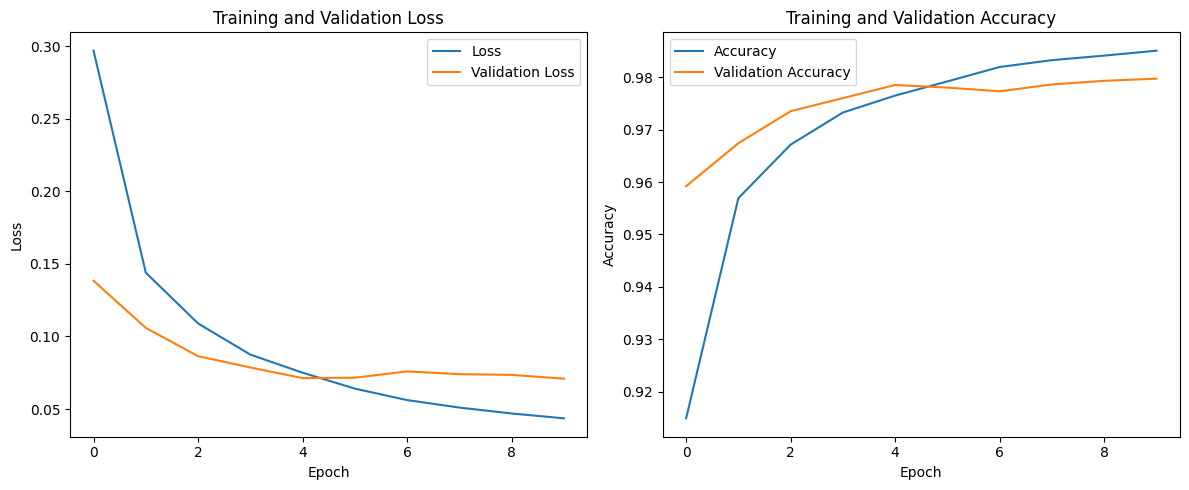

In [33]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot for loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')  
    plt.ylabel('Loss')   
    plt.legend()

    # Plot for accuracy
    plt.subplot(1, 2, 2) 
    plt.plot(history['accuracy'], label='Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')  
    plt.ylabel('Accuracy')  
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(r.history)


In [ ]:
# 5 - Predict

In [28]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.64798541e-09, 5.33810551e-10, 8.38899382e-07, ...,
        9.99994934e-01, 2.23557106e-09, 1.91006194e-07],
       [2.46015319e-10, 5.45741250e-06, 9.99994457e-01, ...,
        6.34518954e-14, 5.47394059e-08, 3.43585205e-18],
       [5.32434485e-10, 9.99971449e-01, 2.19858805e-07, ...,
        1.75434416e-05, 8.37549214e-06, 7.86468846e-09],
       ...,
       [1.36838659e-18, 4.10312201e-11, 5.12212131e-15, ...,
        5.88517679e-08, 6.32936414e-09, 1.40165532e-04],
       [1.12250554e-13, 3.92794060e-13, 5.67059283e-16, ...,
        4.36435610e-11, 9.09954920e-08, 1.63045236e-14],
       [4.93739183e-09, 9.27603730e-18, 6.55469412e-09, ...,
        4.22511760e-16, 1.87089450e-12, 1.21902038e-15]], dtype=float32)

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[ 971    0    0    0    0    1    3    2    1    2]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   4    1 1006    2    0    0    3    5   11    0]
 [   0    0    3  992    0    4    1    4    3    3]
 [   1    0    1    0  962    1    5    2    1    9]
 [   2    0    0   10    1  873    2    1    2    1]
 [   3    2    1    1    2    4  943    0    2    0]
 [   1    4   10    5    2    0    0  993    1   12]
 [   4    0    2    4    4    4    0    3  946    7]
 [   2    2    0    5    6    5    0    3    1  985]]


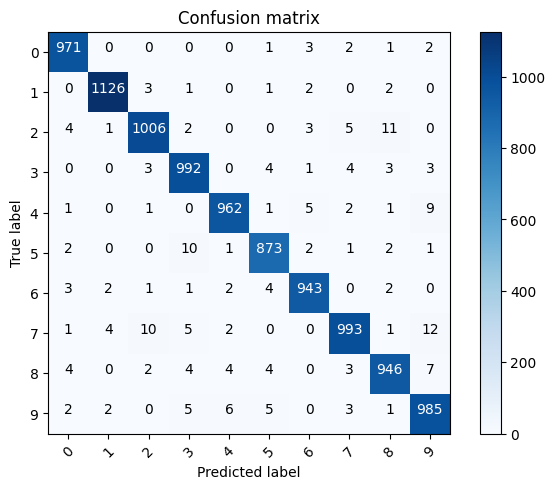

In [30]:
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)  # Ensure this matches your model's output
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))  # Replace list(range(10)) with actual class names if applicable


# What is Convolution? (Part 1)

 ## Convolution = image modifier

Convolution, in the context of a CNN, refers to a mathematical operation used for processing data with a grid-like topology, such as images.

**Detailed Explanation**
- **Fundamental Operation**: Convolution is a core operation in CNNs where a small matrix of weights, known as a `kernel` or `filter`, is applied to an input data (like an image) to extract features.


- **Sliding Window**: The kernel slides over the input data, and at each position, a dot product is computed between the kernel and the portion of the input it covers. This process effectively filters the input data to extract certain features (like edges, textures).


- **Feature Maps**: The result of this operation is a feature map that represents the presence of specific features in the input. For example, in image processing, different kernels can detect edges, blurs, or sharpen features.


- **Stacking Layers**: In CNNs, multiple convolutional layers are often stacked, with each layer capable of detecting more complex features. The first layer might detect simple edges, while deeper layers can detect more complex patterns.


- **Pooling Layers**: Often accompanied by pooling layers, which reduce the spatial dimensions (width and height) of the input volume for the next convolutional layer. This helps in reducing computational load and overfitting.


**Summary**
- Convolution in CNNs is a method where a kernel is used to extract features from data.


- This involves sliding the kernel over the input and computing dot products.


- It results in feature maps highlighting specific characteristics of the input.


- Multiple layers in CNNs detect increasingly complex features.


- Often paired with pooling to reduce dimensionality and computational complexity.


- Convolution plays a crucial role in enabling CNNs to perform well in tasks like image and video recognition, image classification, and many other areas where data can be represented in a grid-like format.

In [41]:
from scipy.signal import convolve2d

sample_image = np.array([
    [0, 10, 10, 0],
    [20, 30, 30, 20],
    [10, 20, 20, 10],
    [0, 5, 5, 0]
])

filter_layer = np.array([
    [1, 0],
    [0, 2]
])


In [43]:
# The mechanics of convolution

def manual_convolution(image, filter_):
    filter_height, filter_width = filter_.shape
    image_height, image_width = image.shape

    # The size of the output will be reduced by filter size - 1
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1

    # Prepare the output matrix
    new_image = np.zeros((output_height, output_width))

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            new_image[i, j] = np.sum(image[i:i+filter_height, j:j+filter_width] * filter_)

    return new_image

In [44]:
output = manual_convolution(sample_image, filter_layer)
output

array([[60., 70., 50.],
       [60., 70., 50.],
       [20., 30., 20.]])

In [46]:
from scipy.signal import convolve2d

convolve2d(sample_image, np.fliplr(np.flipud(filter_layer)), mode='valid')

array([[60, 70, 50],
       [60, 70, 50],
       [20, 30, 20]])

mode = 'valid' has output size `N - K + 1`, where:

- input length = N
- kernel length = K

# Convolution on Colour Images